In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['figure.dpi'] = 100 

# Coupon Collector's Problem

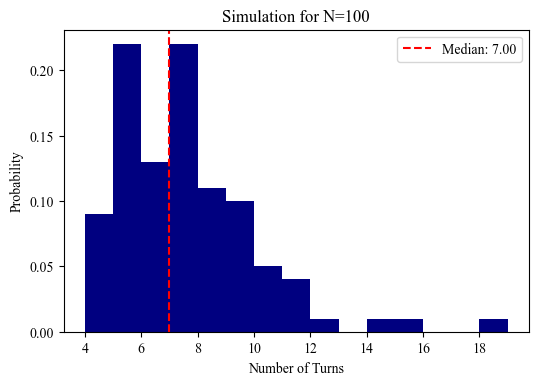

For N=100:
Average number of turns: 7.09
Median number of turns: 7.00
Standard deviation of turns: 2.45




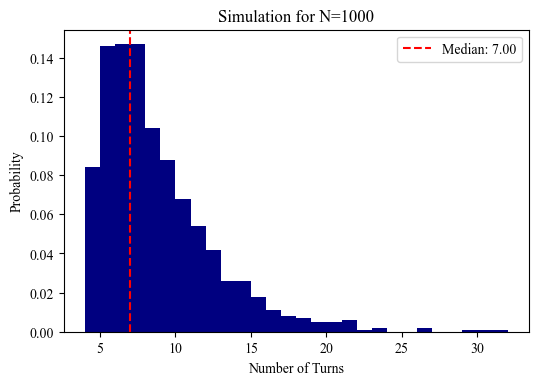

For N=1000:
Average number of turns: 8.32
Median number of turns: 7.00
Standard deviation of turns: 3.80




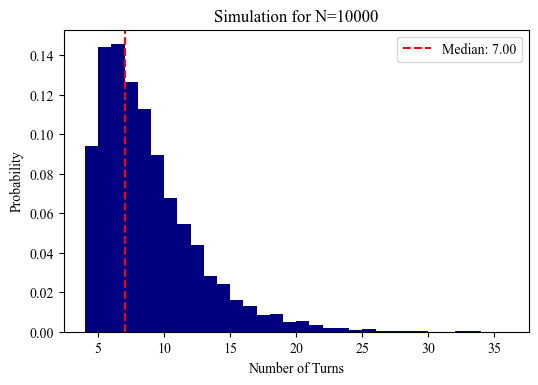

For N=10000:
Average number of turns: 8.32
Median number of turns: 7.00
Standard deviation of turns: 3.79




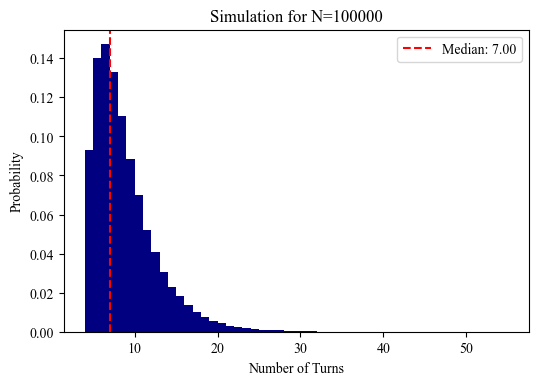

For N=100000:
Average number of turns: 8.32
Median number of turns: 7.00
Standard deviation of turns: 3.77




In [5]:
def shuffled_deck_simulation(N_values):
    def shuffled_deck():
        cards = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        turns_count = 0  # start the counter at 0 for the cards turned
        collected_cards = set()

        # while loop estimates and adds cards each time one is turned to the collection
        while len(collected_cards) < len(cards):
            card = random.choice(cards)
            collected_cards.add(card)
            turns_count += 1

        return turns_count

    for N in N_values:
        turns_values = [shuffled_deck() for _ in range(N)]

        # histogram for the data collected
        plt.hist(turns_values, bins=range(min(turns_values), max(turns_values) + 2), density=True, color='navy')
        plt.xlabel('Number of Turns')
        plt.ylabel('Probability')
        plt.title(f'Simulation for N={N}')
        
        median_turns = np.median(turns_values)
        plt.axvline(median_turns, color='red', linestyle='--', label=f'Median: {median_turns:.2f}')
        plt.legend()

        plt.show()

        mean_turns = np.mean(turns_values)
        std_turns = np.std(turns_values)

        print(f'For N={N}:')
        print(f'Average number of turns: {mean_turns:.2f}')
        print(f'Median number of turns: {median_turns:.2f}')
        print(f'Standard deviation of turns: {std_turns:.2f}')
        print('\n')


N_values_to_simulate = [100, 1000, 10000, 100000]
shuffled_deck_simulation(N_values_to_simulate)

As we increase the value of $N$, we get a more accurate value of the average number of turns that is theoretically expected to be $8.33$. The standard deviation is around $3.7$. With increasing value of $N$, we also get a more well defined curve but it is not a gaussian. The distribution is influenced by the fact that, as the collector gets closer to completing the collection, the probability of drawing a new coupon decreases, leading to a more extended tail in the distribution. This is a characteristic feature of problems where each outcome (drawing a new coupon in this case) is not equally likely at all stages. In the Coupon Collector's Problem, where each card has an equal probability of being chosen, it's expected that the median remains the same for different values of $N$. This is because the probability distribution for the number of turns to collect all coupons follows a specific distribution, and the median is a characteristic of that distribution. In a well-shuffled deck with four suits, each turn has an equal chance of selecting a card from a suit that hasn't been collected yet. This leads to a geometric distribution for the number of turns needed to collect each unique suit, and the median of a geometric distribution is fixed and does not depend on the number of trials $N$.

# Random Walk

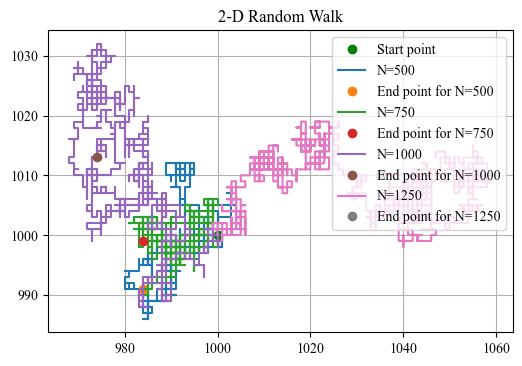

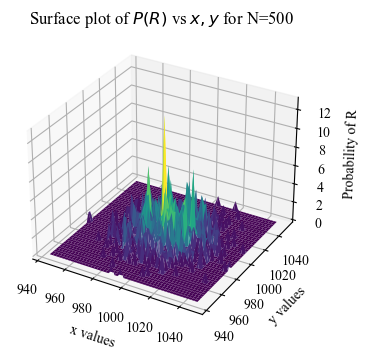

C:\Users\User\AppData\Local\Temp\ipykernel_40408\2211020757.py:65: RuntimeWarning: divide by zero encountered in log
  I = -np.log(hist / N)
D:\Anaconda\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


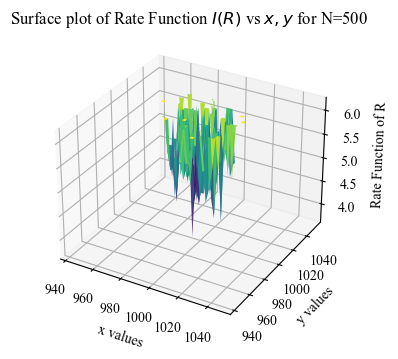

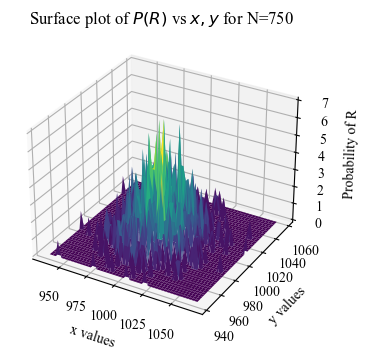

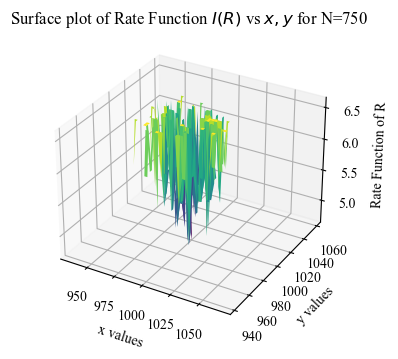

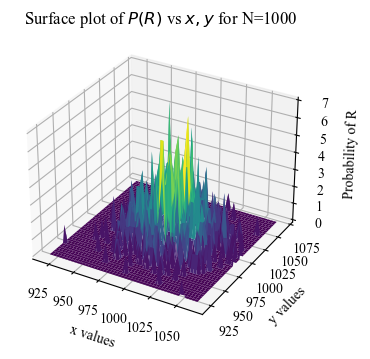

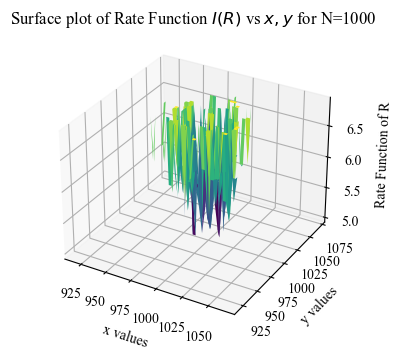

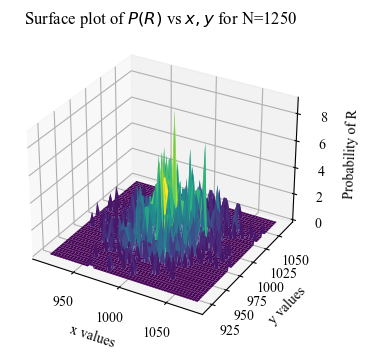

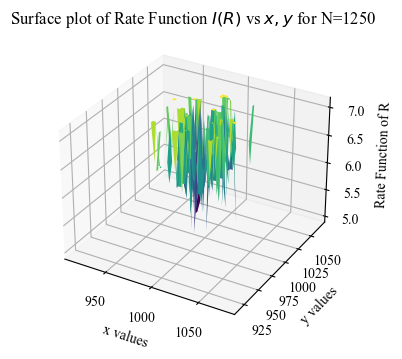

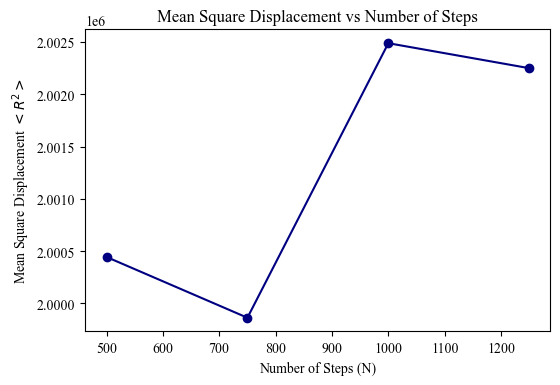

In [8]:
def random_walk_2d(L, N):
    x, y = np.zeros(N), np.zeros(N)
    x[0], y[0] = L, L

    for i in range(1, N):
        val = int(random.uniform(1, 5))

        if val == 1:
            x[i] = x[i-1] + 1
            y[i] = y[i-1]
        elif val == 2:
            x[i] = x[i-1] - 1
            y[i] = y[i-1]
        elif val == 3:
            x[i] = x[i-1]
            y[i] = y[i-1] + 1
        else:
            x[i] = x[i-1]
            y[i] = y[i-1] - 1

    return x, y

def random_walk_2d_plots(L, N):
    x, y = np.zeros(N), np.zeros(N)
    x[0], y[0] = L, L

    for i in range(1, N):
        val = int(random.uniform(1, 5))

        if val == 1:
            x[i] = x[i-1] + 1
            y[i] = y[i-1]
        elif val == 2:
            x[i] = x[i-1] - 1
            y[i] = y[i-1]
        elif val == 3:
            x[i] = x[i-1]
            y[i] = y[i-1] + 1
        else:
            x[i] = x[i-1]
            y[i] = y[i-1] - 1

    return x[-1], y[-1]  # Return the final position

def surface_plots(N):
    # Perform random walks and collect final positions
    final_positions = np.array([random_walk_2d_plots(L, N) for _ in range(1000)])

    # Create a 2D histogram of final positions
    hist, xedges, yedges = np.histogram2d(final_positions[:, 0], final_positions[:, 1], bins=50)

    # Plot the 2D histogram as a surface plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    ax.plot_surface(xpos, ypos, hist, cmap='viridis')
    ax.set_xlabel('x values')
    ax.set_ylabel('y values')
    ax.set_zlabel('Probability of R')
    ax.set_title(f'Surface plot of $P(R)$ vs $x,y$ for N={N}')
    plt.show()

    # Avoid division by zero
    N = max(1, N)  # Ensure N is not zero
    I = -np.log(hist / N)

    # Plot the 2D histogram as a surface plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    ax.plot_surface(xpos, ypos, I, cmap='viridis')
    ax.set_xlabel('x values')
    ax.set_ylabel('y values')
    ax.set_zlabel('Rate Function of R')
    ax.set_title(f'Surface plot of Rate Function $I(R)$ vs $x,y$ for N={N}')
    plt.show()

def mean_square_displacement(N_values):
    mean_square_displacement_values = []

    for N in N_values:
        final_positions = np.array([random_walk_2d_plots(L, N) for _ in range(1000)])
        mean_square_displacement_values.append(np.mean(final_positions[:, 0]**2 + final_positions[:, 1]**2))

    # Plotting mean square displacement as a function of N
    plt.plot(N_values, mean_square_displacement_values, color='navy', marker='o')
    plt.xlabel('Number of Steps (N)')
    plt.ylabel('Mean Square Displacement $<R^2>$')
    plt.title('Mean Square Displacement vs Number of Steps')
    plt.show()

# Set up lattice and steps
L = 1000
N_values = [500, 750, 1000, 1250]

# Plot the random walk
x_start, y_start = L, L  # Common starting point
plt.plot(x_start, y_start, 'o', color='green', label='Start point')

for N in N_values:
    x, y = random_walk_2d(L, N)
    plt.plot(x, y, label=f'N={N}')
    plt.plot(x[N-1], y[N-1], 'o', label=f'End point for N={N}')

plt.legend()
plt.grid()
plt.title('2-D Random Walk')
plt.show()

# Surface plots and mean square displacement for each N
for N in N_values:
    surface_plots(N)

mean_square_displacement(N_values)


# Rumors: Jack and Jill

In a party of 3 people, P (everyone heard the rumor):  1.0
In a party of 4 people, P (everyone heard the rumor):  0.499449
In a party of 5 people, P (everyone heard the rumor):  0.221913
In a party of 6 people, P (everyone heard the rumor):  0.09365
In a party of 7 people, P (everyone heard the rumor):  0.038087
In a party of 8 people, P (everyone heard the rumor):  0.015649
In a party of 9 people, P (everyone heard the rumor):  0.006088
In a party of 10 people, P (everyone heard the rumor):  0.002408
In a party of 11 people, P (everyone heard the rumor):  0.00093
In a party of 12 people, P (everyone heard the rumor):  0.000349
In a party of 13 people, P (everyone heard the rumor):  0.000155
In a party of 14 people, P (everyone heard the rumor):  5.1e-05
In a party of 15 people, P (everyone heard the rumor):  2.3e-05
In a party of 16 people, P (everyone heard the rumor):  1.2e-05
In a party of 17 people, P (everyone heard the rumor):  6e-06
In a party of 18 people, P (everyone heard th

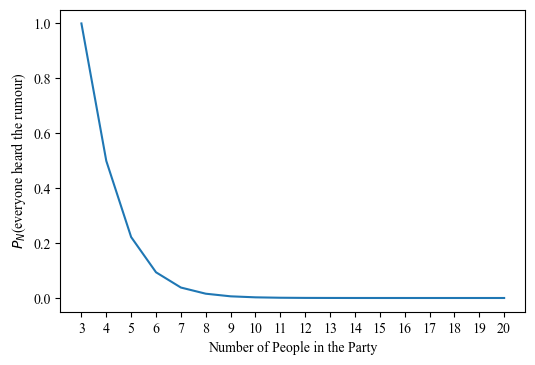

In [58]:
def probability(trials, no_of_people, iterations):  # Finding the probability of everyone hearing the rumor
    full = []  # to store required value

    for i in range(trials):
        a, b, c = rumor_spread(no_of_people, iterations)
        full.append(b)

    probability = np.sum(full) / trials  # Finding probability as explained in the beginning

    return probability

def rumor_has_spread(people):
    i = 1

    while (i < len(people)):
        if (not people[i]):
            return False
        i += 1
    return True

def count_people_heard_rumor(people):  # Finding the number of people who heard the rumor
    counter = 0  # Count is zero initially

    i = 1

    while i < len(people):
        if people[i]:  # if this statement is executed that means the person has heard the rumor,
            # since initially all were false
            counter += 1  # increasing count of person who heard the rumor

        i += 1

    return counter

def rumor_spread(no_of_people, attempts):
    count_times_heard = 0  # Count of no. of times everyone heard the rumor
    count_people_heard = 0  # Count of people who heard the rumor

    i = 0

    while i < attempts:

        # Jill = guests[0], Jack = guests[1], other guests = guests[2:N]
        guests = np.array([False for i in range(0, no_of_people)])
        guests[1] = True

        # person already heard
        alreadyHeard = False

        # Condition to exit while loop
        nextPerson = -1
        currentPerson = 1  # Starting from Jack

        while not alreadyHeard:
            nextPerson = 1 + int((no_of_people - 1) * np.random.uniform(0, 1))  # randomize next person

            if nextPerson == currentPerson:  # Checking if it is not the same person
                while nextPerson == currentPerson:  # while 'same', we randomly call another person
                    nextPerson = 1 + int((no_of_people - 1) * np.random.uniform(0, 1))

            if guests[nextPerson]:  # 'if' "guest" already heard

                if rumor_has_spread(guests):  # 'if' all people heard
                    count_times_heard += 1

                count_people_heard = count_people_heard + count_people_heard_rumor(guests)  # how many people we get
                alreadyHeard = True

            guests[nextPerson] = True
            currentPerson = nextPerson  # Next person heard rumor
        i += 1

        return count_people_heard, count_times_heard, count_times_heard / count_people_heard


def average_people(trials, no_of_people, iterations):  # Finding probability of everyone hearing the rumor
    people_rumor = []  # Storing required value

    for i in range(trials):
        a, b, c = rumor_spread(no_of_people, iterations)
        people_rumor.append(a)

    people_r = np.mean(people_rumor)  # Finding probability

    return people_r

# Finding probability of everyone hearing the rumor for different no. of people at the party
number_of_people = np.arange(3, 21, 1)
iterations = 1000
trials = 10_00_000  # Increase for more accuracy and higher precision

p_arr = []
for i in range(len(number_of_people)):
    p = probability(trials, number_of_people[i], iterations)
    p_arr.append(p)

    print('In a party of {} people, P (everyone heard the rumor): '.format(str(number_of_people[i])), p)
    
plt.plot(number_of_people, p_arr, color='navy', marker='o');
plt.xlabel("Number of People in the Party")
plt.ylabel("$P_N$(everyone heard the rumour)")
plt.xticks(number_of_people)
plt.show()

As expected, the number the probability of people hearing the rumour decreases exponentially as the number of people in the party increases. Average number of people who have heard the rumour would be $\sqrt{N}$, where $N$ is the number of people.

# Volume of a Sphere - Monte Carlo

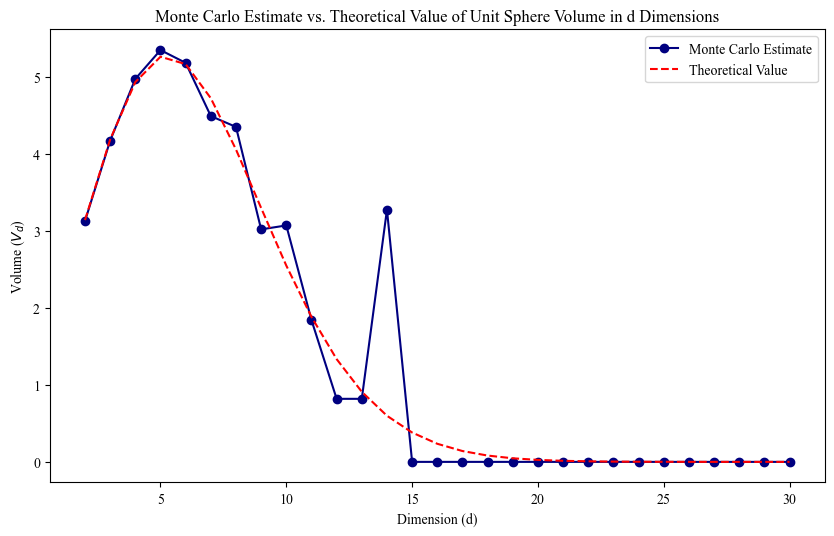

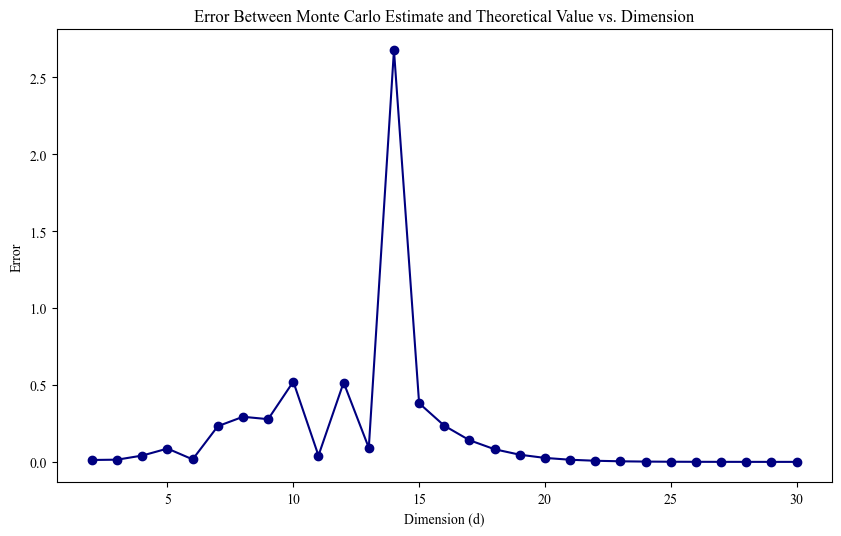

Theoretical volume for d = 5.3: 5.27738124187247
Interpolated volume for d = 5.3: 5.356536
Percentage error: 1.4998870557141244%


In [15]:
def monte_carlo_volume_estimate(dimension, num_points=10000):
    points = np.random.uniform(-1, 1, size=(num_points, dimension))
    distances = np.linalg.norm(points, axis=1)
    inside_sphere = np.sum(distances <= 1)
    total_points = len(points)
    volume_estimate = (inside_sphere / total_points) * (2 ** dimension)
    return volume_estimate

# Calculate volumes for d = 2 and d = 3
dimensions = [2, 3]
volumes = [monte_carlo_volume_estimate(d) for d in dimensions]

# Calculate volumes for d = 2 to d = 30
for d in range(4, 31):
    volumes.append(monte_carlo_volume_estimate(d))

# Plot Vd vs d
plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), volumes, marker='o', color='navy', label='Monte Carlo Estimate')

# Calculate theoretical values using the math module
theoretical_volumes = [math.pi**(d/2) / math.gamma((d/2) + 1) for d in range(2, 31)]
plt.plot(range(2, 31), theoretical_volumes, linestyle='--', color='red', label='Theoretical Value')

plt.xlabel('Dimension (d)')
plt.ylabel('Volume ($V_d$)')
plt.title('Monte Carlo Estimate vs. Theoretical Value of Unit Sphere Volume in d Dimensions')
plt.legend()
plt.show()

# Calculate the error between Monte Carlo and Theoretical values
errors = np.abs(np.array(theoretical_volumes) - np.array(volumes))
dimensions_for_errors = range(2, 31)

# Plot Error vs. Dimension
plt.figure(figsize=(10, 6))
plt.plot(dimensions_for_errors, errors, marker='o', color='navy')
plt.xlabel('Dimension (d)')
plt.ylabel('Error')
plt.title('Error Between Monte Carlo Estimate and Theoretical Value vs. Dimension')
plt.show()

# Estimate Vd for d = 5.3 using Lagrange interpolation
def lagrange_interpolation(x, x_points, y_points):
    result = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

# Choose three or four points for Lagrange interpolation
interpolation_points = [4, 5, 6, 7]
interpolated_volume = lagrange_interpolation(5.3, interpolation_points, volumes[2:6])

# Calculate theoretical volume for d = 5.3
theoretical_volume_5_3 = math.pi**(5.3/2) / math.gamma((5.3/2) + 1)

# Calculate percentage error
percentage_error = np.abs((theoretical_volume_5_3 - interpolated_volume) / theoretical_volume_5_3) * 100

print(f"Theoretical volume for d = 5.3: {theoretical_volume_5_3}")
print(f"Interpolated volume for d = 5.3: {interpolated_volume}")
print(f"Percentage error: {percentage_error}%")


The Monte-Carlo estimate follows the expected theoretical curve. The error increases till $d=14$ then it decreases. Our interpolation result is very close to the actual value.

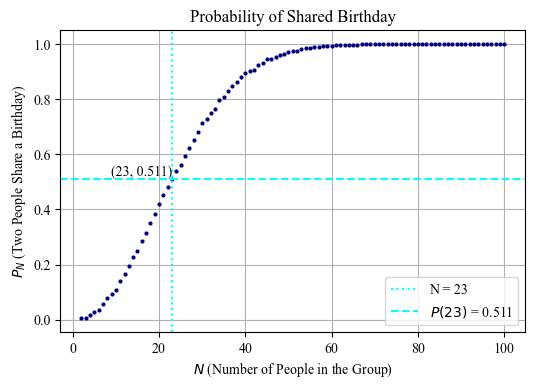

In [17]:
def contains_duplicates(X):
    return len(X) != len(set(X))

def birthday(number_of_people, N):
    shared_birthday = 0
    total_number_of_experiments = 0
    
    for _ in range(N):
        dates = np.random.uniform(0, 366, size=number_of_people).astype(int)
        
        if contains_duplicates(dates):
            shared_birthday += 1
        total_number_of_experiments += 1
        
    probability = shared_birthday / total_number_of_experiments
    return probability

N = 10000
xvals = np.arange(2, 101)
yvals = []

for number_of_people in xvals:
    yvals.append(birthday(number_of_people, N))

plt.plot(xvals, yvals, 'o', color='navy',ms=2)
plt.xlabel('$N$ (Number of People in the Group)')
plt.ylabel('$P_N$ (Two People Share a Birthday)')
plt.title("Probability of Shared Birthday")
plt.grid(True)

# Implementing Lagrange Interpolation
xp = 23
yp = 0

for i in range(len(yvals)):
    p = 1
    for j in range(len(yvals)):
        if i != j:
            p = p * (xp - xvals[j]) / (xvals[i] - xvals[j])
    yp = yp + p * yvals[i]

plt.axvline(x=xp, color='cyan', ls=':', label='N = {}'.format(xp))
plt.axhline(y=yp, color='cyan', ls='--', label=f'$P(23)$ = {yp:.3f}')
plt.text(xp, yp, f'({xp}, {yp:.3f})', ha='right', va='bottom')
plt.legend()
plt.show()

As expected from intuition, the probability of a shared birthday increases with the number of people. From the plot it is clear that the probability of a shared birthday exceeds $50\%$ in a group of only 23 people as $P(23) = 0.511$ from the plot which is greater than $50\%$. Another interesting result observed is that if the number of people exceeds $60$, the probability of a shared birthday becomes almost equal to $100\%$.